In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- *pandas* digunakan untuk manipulasi data berbentuk tabel (dataframe)

- *matplotlib.pyplot* dan seaborn untuk membuat grafik dan visualisasi data
- *numpy* untuk operasi matematika dan array yang lebih efisien.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/KULIAH/DATASET UAS BENGKOD /ObesityDataSet (1).csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**MENAMPILKAN DATASET**

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(path)

**MENAMPILKAN DATA**

In [ ]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


fungsi head() dari dataframe df untuk menampilkan 5 baris pertama data dalam dataset.

In [ ]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3,3,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


fungsi tail() dari dataframe df untuk menampilkan 5 baris terakhir data dalam dataset.

**MENGUBAH TYPE DATA OBJECT JADI FLOAT/INT**

In [ ]:
# Ubah kolom-kolom numerik menjadi tipe float/int (jika masih object)
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

## EDA (EXPLORATORY DATA ANALYSIS)

**MENAMPILKAN INFO UMUM**

In [ ]:
# Informasi umum dataset
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF                             20

Bagian kode ini mengecek apakah ada nilai kosong (missing values) dalam dataset menggunakan fungsi df.isnull().sum(). Fungsi ini menghitung jumlah nilai kosong di setiap kolom.
- terdapat 2111 data dgn 17 kolom, dan terdapat banyak missing values

**MENAMPILKAN DESKRIPSI**


In [ ]:
# deskripsi statistik fitur numerik
desc = df.describe()
desc

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


Kode ini menampilkan ringkasan statistik deskriptif dari dataframe df dengan menggunakan fungsi df.describe(). Statistik yang ditampilkan meliputi jumlah data (count), nilai unik, nilak maks, dan modus


**VISUALISASI DATA**

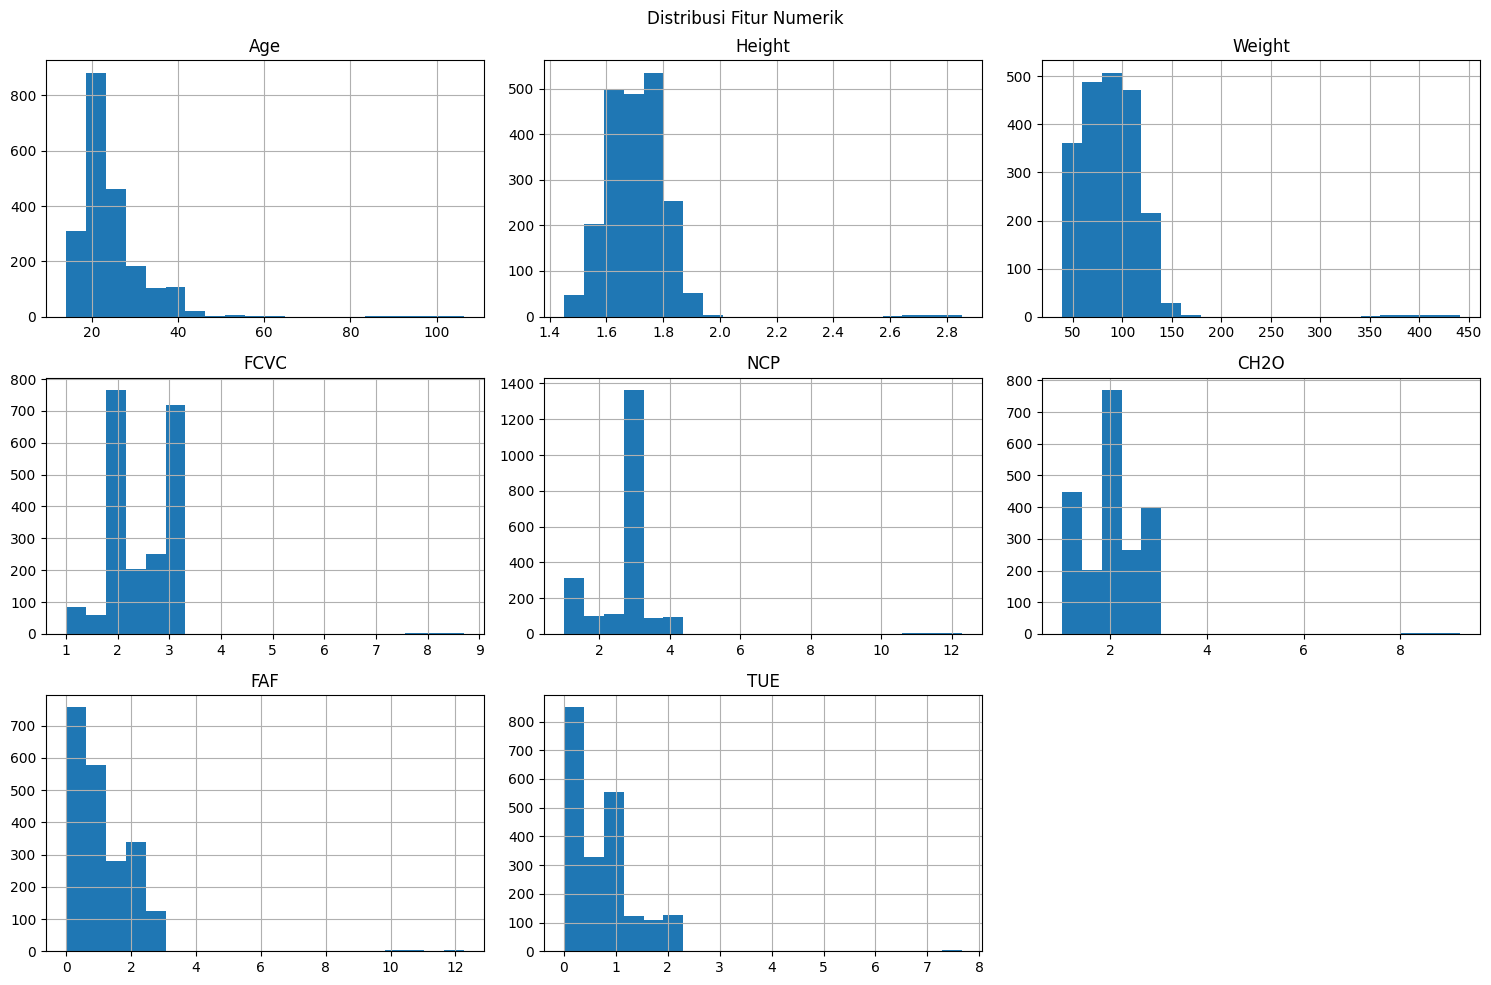

In [ ]:
# VISUALISASI DATA
# Plot histogram
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()

**MENGECEK NILAI UNIK**

In [ ]:
# cek nilai unik per kolom
unique_values = df.nunique()
unique_values

,0
Age,1393
Gender,3
Height,1561
Weight,1517
CALC,5
FAVC,3
FCVC,807
NCP,636
SCC,3
SMOKE,3


**MENGECEK NILAI UNIK**

In [ ]:
print("\nJumlah nilai unik per kolom:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik")


Jumlah nilai unik per kolom:
Age: 1393 nilai unik
Gender: 3 nilai unik
Height: 1561 nilai unik
Weight: 1517 nilai unik
CALC: 5 nilai unik
FAVC: 3 nilai unik
FCVC: 807 nilai unik
NCP: 636 nilai unik
SCC: 3 nilai unik
SMOKE: 3 nilai unik
CH2O: 1262 nilai unik
family_history_with_overweight: 3 nilai unik
FAF: 1185 nilai unik
TUE: 1129 nilai unik
CAEC: 5 nilai unik
MTRANS: 6 nilai unik
NObeyesdad: 7 nilai unik


**MENGHAPUS SPASI DI AWAL DAN AKHIR SETIAP KOLOM**

In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

**MENGECEK MISSING VALUES**

In [ ]:
# Cek missing values
missing_values = df.isnull().sum()
missing_values

,0
Age,22
Gender,9
Height,22
Weight,19
CALC,5
FAVC,11
FCVC,18
NCP,22
SCC,10
SMOKE,5


**MENGECEK DATA DUPLIKAT**

In [ ]:
# Cek data duplikat

print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
18


**CEK KESEIMBANGAN DATA**

In [ ]:
# cek keseimbangan data

print("\nDistribusi label:")
print(df["NObeyesdad"].value_counts(normalize=True))


Distribusi label:
NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64


**DISTRIBUSI DATA TARGET**

In [ ]:
# Distribusi data target
target_dist = df['NObeyesdad'].value_counts()
target_dist

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


**VISUALISASI DISTRIBUSI TARGET NObeyesdad**

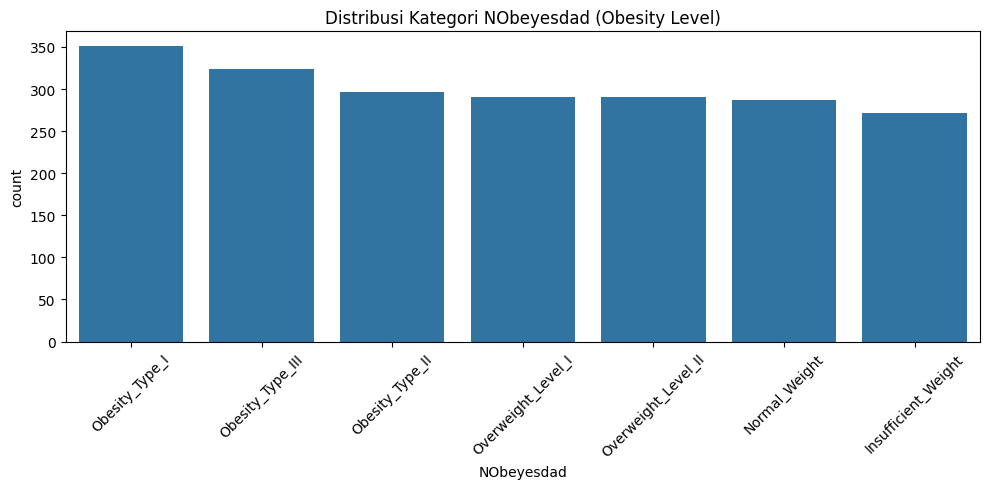

In [ ]:
# Visualisasi distribusi target
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kategori NObeyesdad (Obesity Level)')
plt.tight_layout()
plt.show()

**VISUALISASI DISTRIBUSI SEMUA KOLOM**

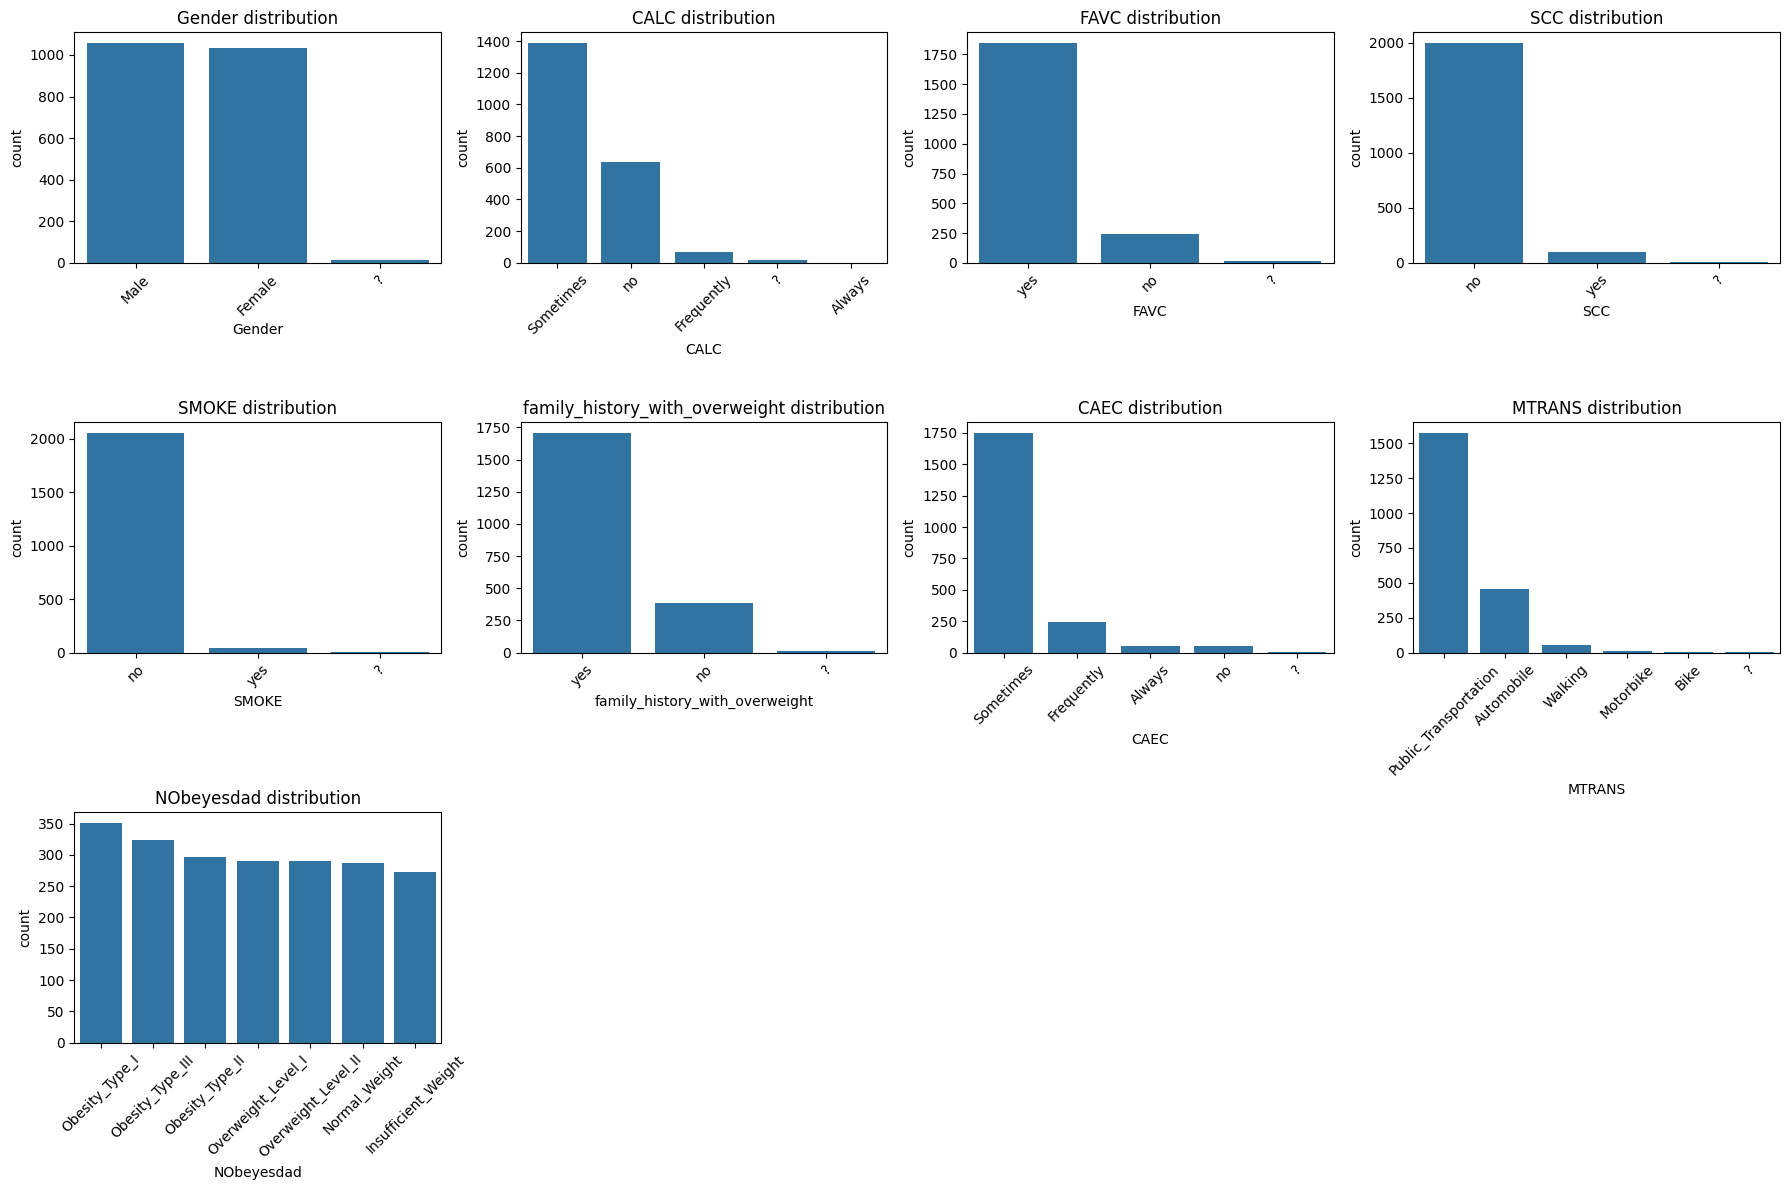

In [ ]:
# Hanya plot kolom yang kategorikal dengan jumlah kategori <= 20
cat_cols = [c for c in df.select_dtypes('object').columns
            if df[c].nunique() <= 20]

n = len(cat_cols)
n_cols = 4
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=df, x=col, ax=ax,
                  order=df[col].value_counts().index)
    ax.set_title(f'{col} distribution')
    ax.tick_params(axis='x', rotation=45)

# Hapus sumbu kosong
for ax in axes.flatten()[n:]:
    ax.remove()

plt.tight_layout()
plt.show()

**MENDETEKSI OUTLIER**

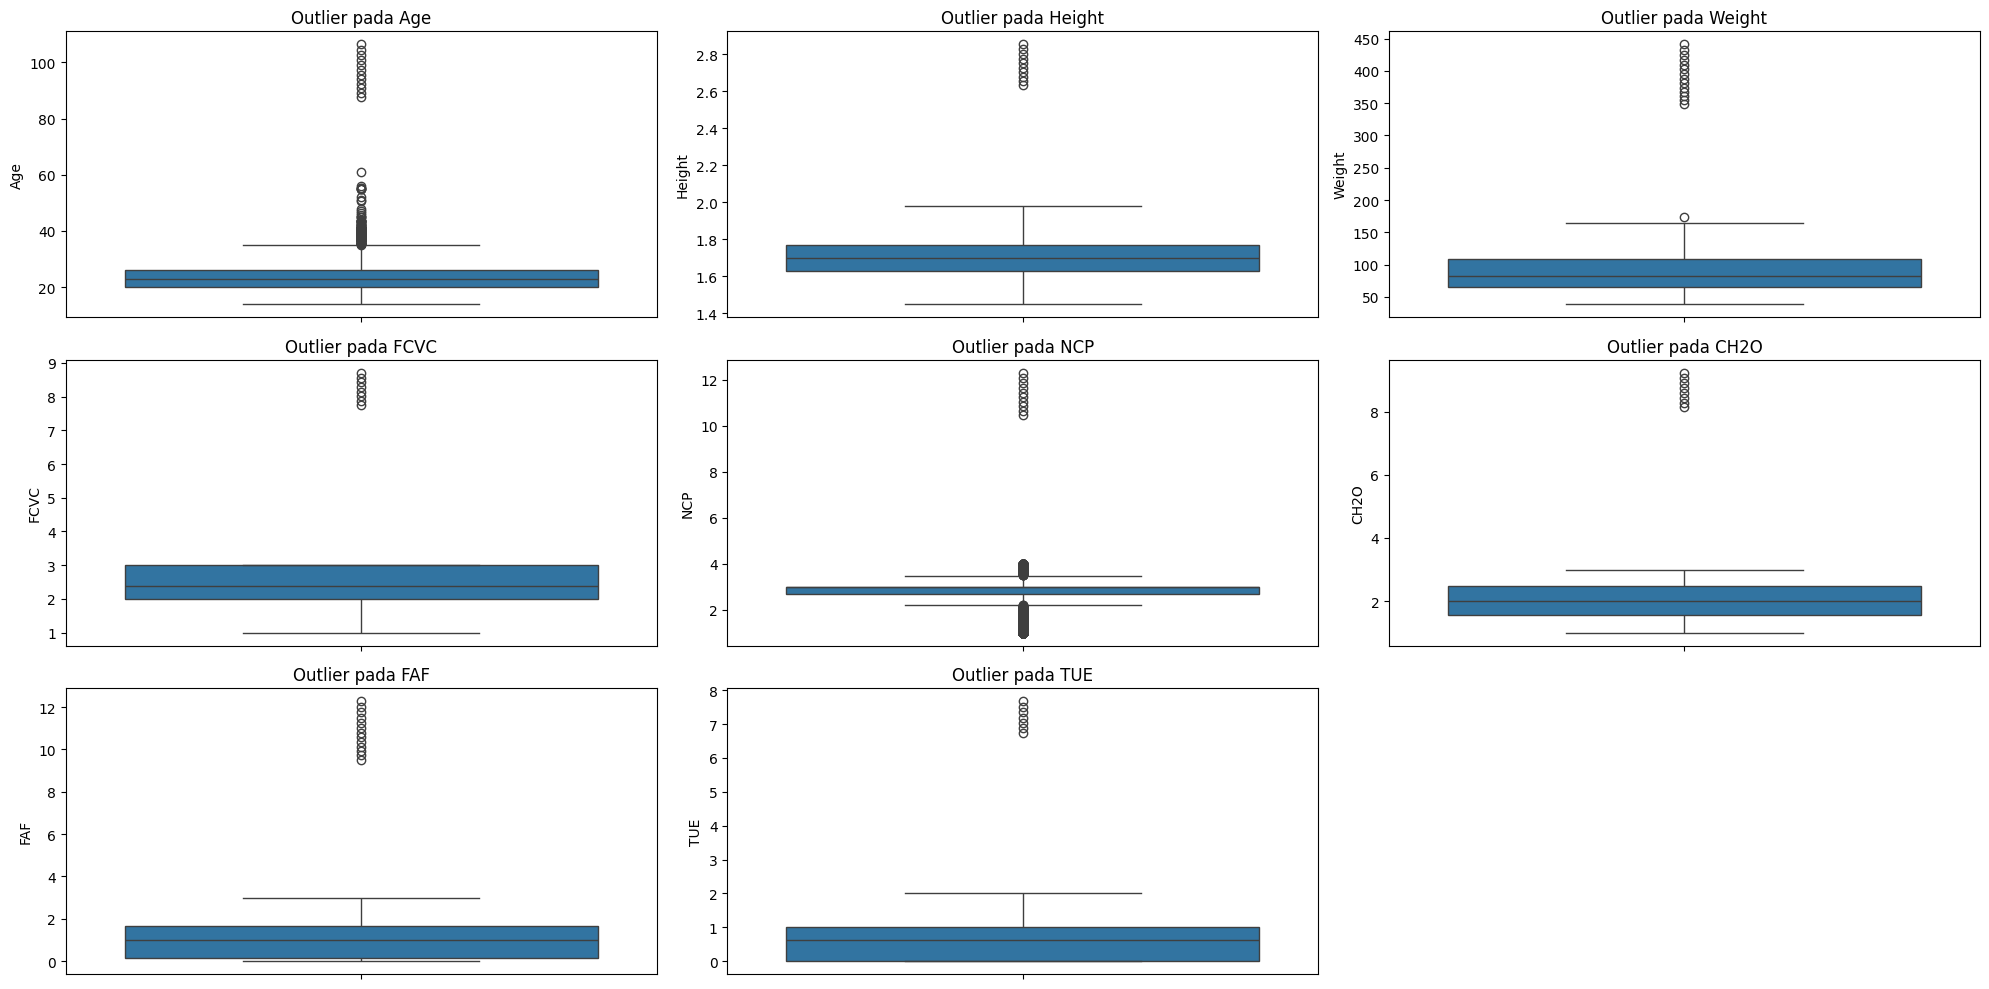

In [ ]:
# deteksi outlier
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outlier pada {col}')
plt.tight_layout()
plt.show()

**KESIMPULAN PROSES EDA**



Dataset memiliki 2111 entri dengan 17 kolom, tetapi beberapa fitur numerik seperti Age, Height, dan Weight masih bertipe teks dan harus dikonversi. Terdapat beberapa missing values dan ternyata juga terdapat 18 data duplikat yang perlu dihapus. Distribusi target tidak seimbang, dan dari boxplot ditemukan beberapa outlier ekstrem di fitur seperti Weight, FAF, dan TUE.



# **PREPROCESSING**


**MENGATASI DATA DUPLIKAT**

penghapusan data duplikat

In [ ]:
df = df.drop_duplicates()

**MENGECEK DATA DUPLIKAT SETELAH DIHAPUS**

In [ ]:
# Mengecek duplikat setelah dihapus
df.duplicated().sum()


np.int64(0)

**MENGATASI NILAI UNIK**

mengecek nilai unik

In [ ]:
column = ["Gender", "CALC", "FAVC",	"SCC",	"SMOKE",	"family_history_with_overweight",	"CAEC", "MTRANS",	"NObeyesdad"]
for col in column:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-" * 40)

Kolom: Gender
['Female' 'Male' '?' nan]
----------------------------------------
Kolom: CALC
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
----------------------------------------
Kolom: FAVC
['no' 'yes' '?' nan]
----------------------------------------
Kolom: SCC
['no' 'yes' nan '?']
----------------------------------------
Kolom: SMOKE
['no' 'yes' '?' nan]
----------------------------------------
Kolom: family_history_with_overweight
['yes' 'no' nan '?']
----------------------------------------
Kolom: CAEC
['Sometimes' 'Frequently' 'Always' 'no' nan '?']
----------------------------------------
Kolom: MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike' '?' nan]
----------------------------------------
Kolom: NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
----------------------------------------


mengganti nilai unik ? menjadi NaN

In [ ]:
# Ganti '?' menjadi np.nan untuk kolom-kolom kategori
column = ["Gender", "CALC", "FAVC", "SCC", "SMOKE",
          "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]

for col in column:
    df[col] = df[col].replace('?', np.nan)

# Cek jumlah missing value setelah dibersihkan
print(df[column].isnull().sum())

Gender                            22
CALC                              20
FAVC                              22
SCC                               18
SMOKE                             13
family_history_with_overweight    23
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


<ipython-input-104-1819751573>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('?', np.nan)


**MENANGANI MISSING VALUES**

mengisi missing value pada nilai numerik dengan median, dan pada nilai kategorikal dengan modus

In [ ]:
# Numerik dengan median
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())


<ipython-input-105-4106596042>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())


In [ ]:
# Kategorikal dengan modus
categorical_columns = df.select_dtypes(include='object').columns.tolist()
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

<ipython-input-106-3453808381>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


**MENGECEK MISSING VALUES SETELAH DIISI DGN MEDIAN DAN MODUS**

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [ ]:
display(df)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


**MENGATASI OUTLIER**

menghandle outlier dengan winsorizing/mengganti batas atas/batas bawah

In [ ]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan batas bawah/atas (winsorizing)
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Terapkan pada kolom numerik
for col in numeric_columns:
    df = handle_outliers_iqr(df, col)

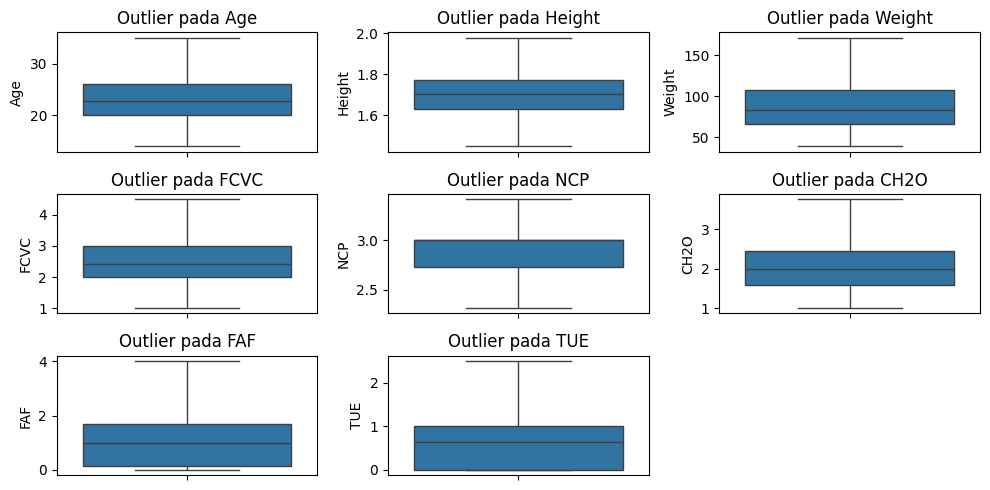

In [ ]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outlier pada {col}')
plt.tight_layout()
plt.show()

**LABEL ENCODING**

In [ ]:
# melihat kolom
column = ["Gender", "CALC", "FAVC",	"SCC",	"SMOKE",	"family_history_with_overweight",	"CAEC", "MTRANS",	"NObeyesdad"]
for col in column:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-" * 40)

Kolom: Gender
['Female' 'Male']
----------------------------------------
Kolom: CALC
['no' 'Sometimes' 'Frequently' 'Always']
----------------------------------------
Kolom: FAVC
['no' 'yes']
----------------------------------------
Kolom: SCC
['no' 'yes']
----------------------------------------
Kolom: SMOKE
['no' 'yes']
----------------------------------------
Kolom: family_history_with_overweight
['yes' 'no']
----------------------------------------
Kolom: CAEC
['Sometimes' 'Frequently' 'Always' 'no']
----------------------------------------
Kolom: MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
----------------------------------------
Kolom: NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
----------------------------------------


mengubah data kategorikal menjadi numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

if col == 'NObeyesdad':
        target_encoder = le


melihat kolom setelah di label encoding

In [ ]:
# melihat kolom lagi setelah di label encoding
column = ["Gender", "CALC", "FAVC",	"SCC",	"SMOKE",	"family_history_with_overweight",	"CAEC", "MTRANS",	"NObeyesdad"]
for col in column:
    print(f"Kolom: {col}")
    print(df[col].unique())
    print("-" * 40)

Kolom: Gender
[0 1]
----------------------------------------
Kolom: CALC
[3 2 1 0]
----------------------------------------
Kolom: FAVC
[0 1]
----------------------------------------
Kolom: SCC
[0 1]
----------------------------------------
Kolom: SMOKE
[0 1]
----------------------------------------
Kolom: family_history_with_overweight
[1 0]
----------------------------------------
Kolom: CAEC
[2 1 0 3]
----------------------------------------
Kolom: MTRANS
[3 4 0 2 1]
----------------------------------------
Kolom: NObeyesdad
[1 5 6 2 0 3 4]
----------------------------------------


melihat hasil label encoding

In [ ]:
df.head(20)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.62,64.000000,3,0,2.0,3.000000,0,0,2.0,1,0.0,1.000000,2,3,1
1,21.000000,0,1.52,56.000000,2,0,3.0,3.000000,1,1,3.0,1,3.0,0.000000,2,3,1
2,23.000000,1,1.80,77.000000,1,0,2.0,3.000000,0,0,2.0,1,2.0,1.000000,2,3,1
3,27.000000,1,1.80,87.000000,1,0,3.0,3.000000,0,0,2.0,0,2.0,0.000000,2,4,5
4,22.000000,1,1.78,89.800000,2,0,2.0,2.312530,0,0,2.0,0,0.0,0.000000,2,3,6
5,29.000000,1,1.62,53.000000,2,1,2.0,3.000000,0,0,2.0,0,0.0,0.000000,2,0,1
6,23.000000,0,1.50,55.000000,2,1,3.0,3.000000,0,0,2.0,1,1.0,0.000000,2,2,1
7,22.000000,1,1.64,53.000000,2,0,2.0,3.000000,0,0,2.0,0,3.0,0.000000,2,3,1
8,24.000000,1,1.78,171.110782,1,1,3.0,3.000000,0,0,2.0,1,1.0,1.000000,2,3,1
9,22.000000,1,1.72,68.000000,3,1,2.0,3.000000,0,0,2.0,1,1.0,1.000000,2,3,1


**HEATMAP KORELASI**

menampilkan heatmap korelasi

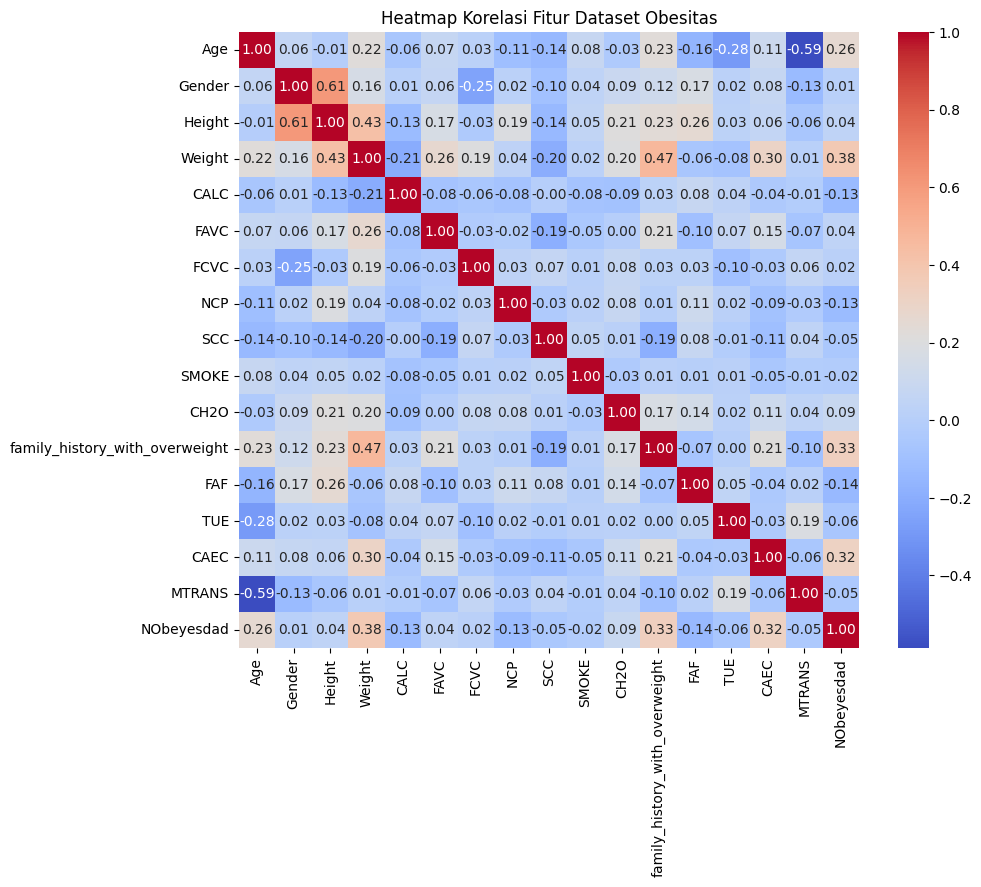

In [ ]:
# Hitung korelasi (Pearson) antar fitur
corr = df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap Korelasi Fitur Dataset Obesitas")
plt.show()

In [ ]:
# Analisis sederhana korelasi
def korelasi_analisis(corr_matrix, target_col='NObeyesdad', threshold=0.3):
    print("Fitur dengan korelasi positif cukup kuat dengan target (>", threshold, "):")
    strong_pos = corr_matrix[target_col][corr_matrix[target_col] > threshold].sort_values(ascending=False)
    # Ganti iteritems() dengan items()
    for feat, val in strong_pos.items():
        if feat != target_col:
            print(f" - {feat}: korelasi = {val:.2f}")

    print("\nFitur dengan korelasi negatif cukup kuat dengan target (< -", threshold, "):")
    strong_neg = corr_matrix[target_col][corr_matrix[target_col] < -threshold].sort_values()
    # Ganti iteritems() dengan items()
    for feat, val in strong_neg.items():
        if feat != target_col:
            print(f" - {feat}: korelasi = {val:.2f}")

In [ ]:
# Tampilkan hasil analisis korelasi
korelasi_analisis(corr, target_col='NObeyesdad', threshold=0.3)

Fitur dengan korelasi positif cukup kuat dengan target (> 0.3 ):
 - Weight: korelasi = 0.38
 - family_history_with_overweight: korelasi = 0.33
 - CAEC: korelasi = 0.32

Fitur dengan korelasi negatif cukup kuat dengan target (< - 0.3 ):


In [ ]:
# Korelasi antara fitur numerik dan target
corr = df.corr(numeric_only=True)

# Cek fitur dengan korelasi rendah ke target
print(corr["NObeyesdad"].sort_values())

FAF                              -0.136764
CALC                             -0.131190
NCP                              -0.126906
TUE                              -0.063827
SCC                              -0.049996
MTRANS                           -0.046732
SMOKE                            -0.022741
Gender                            0.012436
FCVC                              0.020544
FAVC                              0.039574
Height                            0.041380
CH2O                              0.087193
Age                               0.261181
CAEC                              0.316037
family_history_with_overweight    0.332586
Weight                            0.378876
NObeyesdad                        1.000000
Name: NObeyesdad, dtype: float64


Jika nilainya jauh mendekati 0 maka fitur nya kurang berkorelasi... seperti contoh dibawah

* TUE                              -0.063827
* SCC                              -0.049996
* MTRANS                           -0.046732
* SMOKE                            -0.022741
* Gender                            0.012436
* FCVC                              0.020544
* FAVC                              0.039574
* Height                            0.041380
* CH2O                              0.087193

**NORMALISASI / SCALING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Tentukan kolom numerik yang akan discale
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']

# Inisialisasi scaler
scaler = MinMaxScaler()

# Terapkan fit_transform pada kolom numerik
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Cek hasil scaling
df.head(20)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.332853,0,0.322271,0.189235,3,0,0.285714,3.000000,0,0,0.36275,1,0.000000,0.400000,2,3,1
1,0.332853,0,0.132700,0.128680,2,0,0.571429,3.000000,1,1,0.72550,1,0.747549,0.000000,2,3,1
2,0.427954,1,0.663498,0.287637,1,0,0.285714,3.000000,0,0,0.36275,1,0.498366,0.400000,2,3,1
3,0.618156,1,0.663498,0.363331,1,0,0.571429,3.000000,0,0,0.36275,0,0.498366,0.000000,2,4,5
4,0.380404,1,0.625584,0.384526,2,0,0.285714,2.312530,0,0,0.36275,0,0.000000,0.000000,2,3,6
5,0.713257,1,0.322271,0.105972,2,1,0.285714,3.000000,0,0,0.36275,0,0.000000,0.000000,2,0,1
6,0.427954,0,0.094785,0.121110,2,1,0.571429,3.000000,0,0,0.36275,1,0.249183,0.000000,2,2,1
7,0.380404,1,0.360185,0.105972,2,0,0.285714,3.000000,0,0,0.36275,0,0.747549,0.000000,2,3,1
8,0.475505,1,0.625584,1.000000,1,1,0.571429,3.000000,0,0,0.36275,1,0.249183,0.400000,2,3,1
9,0.380404,1,0.511842,0.219513,3,1,0.285714,3.000000,0,0,0.36275,1,0.249183,0.400000,2,3,1


**MENGECEK LAGI TIPE DATA**

In [ ]:
print(df.dtypes)
print(df.describe(include='all'))

Age                               float64
Gender                              int64
Height                            float64
Weight                            float64
CALC                                int64
FAVC                                int64
FCVC                              float64
NCP                               float64
SCC                                 int64
SMOKE                               int64
CH2O                              float64
family_history_with_overweight      int64
FAF                               float64
TUE                               float64
CAEC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object
               Age       Gender       Height       Weight         CALC  \
count  2093.000000  2093.000000  2093.000000  2093.000000  2093.000000   
mean      0.474183     0.508361     0.481030     0.365418     2.267559   
std       0.252385     0.500050     0.179272     0

**SIMPAN HASIL PRE-PROCESSING**

In [ ]:
df.to_csv('data_preprocessed.csv', index=False)

**KESIMPULAN PRE-PROCESSING**

Pre-processing untuk menyiapkan data dimulai dengan mengubah kolom relevan menjadi tipe numerik. Kemudian, data duplikat (18 baris ditemukan) dihapus. Nilai yang hilang diisi dengan median untuk kolom numerik dan modus untuk kolom kategorikal. Nilai outlier dibatasi menggunakan metode IQR. Variabel kategorikal diubah menjadi angka dengan Label Encoding. Terakhir, fitur numerik dibuat menjadi Skala (Scaling) agar berada dalam rentang yang sama (0 hingga 1). Langkah-langkah ini membuat data lebih bersih dan siap untuk analisis atau pelatihan model.

# **PEMODELAN DAN EVALUASI**

**PEMISAHAN FITUR (X) DAN TARGET (y)**

target adalah kolom 'NObeyesdad', sehingga X sebagai fitur, dan y sebagai label atau target

In [ ]:
# Membagi data menjadi fitur (X) dan target (y)
X = df.drop(columns=['NObeyesdad'])  # Semua kolom kecuali target
y = df['NObeyesdad']  # Kolom target


**PEMBAGIAN DATA LATIH DAN UJI**

Untuk mengevaluasi model, kita perlu membagi data menjadi dua bagian:

- Data Training: untuk melatih model.
- Data Testing: untuk menguji dan evaluasi model yang sudah dilatih

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

80% data digunakan untuk Training, 20% data untuk Testing

**MENANGANI IMBALANCE DATA DENGAN SMOTE**

In [ ]:
# Terapkan SMOTE hanya pada data latih

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Shape of X_train after SMOTE:", X_train_res.shape)
print("Shape of y_train after SMOTE:", y_train_res.shape)

Shape of X_train after SMOTE: (1967, 16)
Shape of y_train after SMOTE: (1967,)


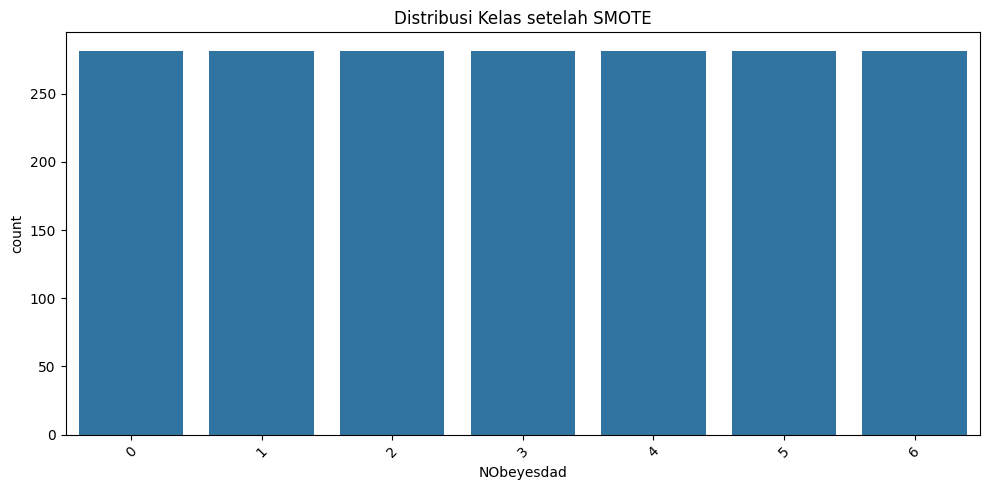

In [ ]:
# Mengecek distribusi data latih setelah SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_res)
plt.title('Distribusi Kelas setelah SMOTE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

distribusi mennujukkan bawah data sudah balance karena proses oversampling menggunakan SMOTE

**Membangun dan Melatih Model KNN, RANDOM FOREST, SVM**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Membuat dan melatih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Membuat dan melatih model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Membuat dan melatih model SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

- KNN (K-Nearest Neighbors): Model ini menggunakan kedekatan antara data untuk membuat prediksi. Dalam kode ini, n_neighbors=5 berarti model akan melihat 5 tetangga terdekat untuk memutuskan kelas data.

- Random Forest: Model ini membuat beberapa pohon keputusan (decision trees) dan menggabungkan hasil mereka. n_estimators=100 berarti model ini menggunakan 100 pohon keputusan.

- SVM (Support Vector Machine): Model ini mencoba memisahkan data dengan menggunakan sebuah "garis pemisah" (hyperplane) yang memaksimalkan margin antara kelas.

**EVALUASI MODEL**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Menghitung Prediksi Setiap Model

In [ ]:
# Prediksi dengan setiap model
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

Menghitung Akurasi Setiap Model

In [ ]:
# Menghitung akurasi untuk setiap model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

Menampilkan Hasil Evaluasi

In [ ]:
# Tampilkan hasil evaluasi
print("Akurasi KNN:", accuracy_knn)
print("Akurasi Random Forest:", accuracy_rf)
print("Akurasi SVM:", accuracy_svm)

Akurasi KNN: 0.7541766109785203
Akurasi Random Forest: 0.9403341288782816
Akurasi SVM: 0.7589498806682577


**MENGHITUNG CLASSIFICATION REPORT**

In [ ]:
# Menghitung classification report (precision, recall, F1-score)
report_knn = classification_report(y_test, y_pred_knn)
report_rf = classification_report(y_test, y_pred_rf)
report_svm = classification_report(y_test, y_pred_svm)

In [ ]:
# Tampilkan classification report dan confusion matrix
print("\nClassification Report KNN:\n", report_knn)
print("\nClassification Report Random Forest:\n", report_rf)
print("\nClassification Report SVM:\n", report_svm)


Classification Report KNN:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76        56
           1       0.53      0.54      0.54        57
           2       0.65      0.76      0.70        70
           3       0.90      0.96      0.93        72
           4       0.98      0.98      0.98        58
           5       0.77      0.65      0.70        51
           6       0.67      0.55      0.60        55

    accuracy                           0.75       419
   macro avg       0.75      0.74      0.74       419
weighted avg       0.75      0.75      0.75       419


Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        56
           1       0.80      0.93      0.86        57
           2       0.97      0.94      0.96        70
           3       0.99      0.99      0.99        72
           4       1.00      1.00      1.00        58
          

- Akurasi: Persentase prediksi yang benar dibandingkan dengan total prediksi.

- Precision: Kemampuan model untuk mengklasifikasikan kelas positif dengan benar.

- Recall: Kemampuan model untuk menemukan semua kasus positif.

- F1-Score: Kombinasi antara precision dan recall, memberikan gambaran keseluruhan tentang kinerja model.

- Confusion Matrix: Matriks yang menunjukkan jumlah prediksi benar dan salah berdasarkan kelas yang ada.

**CONFUSSION MATRIX**

In [ ]:
# Menghitung confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

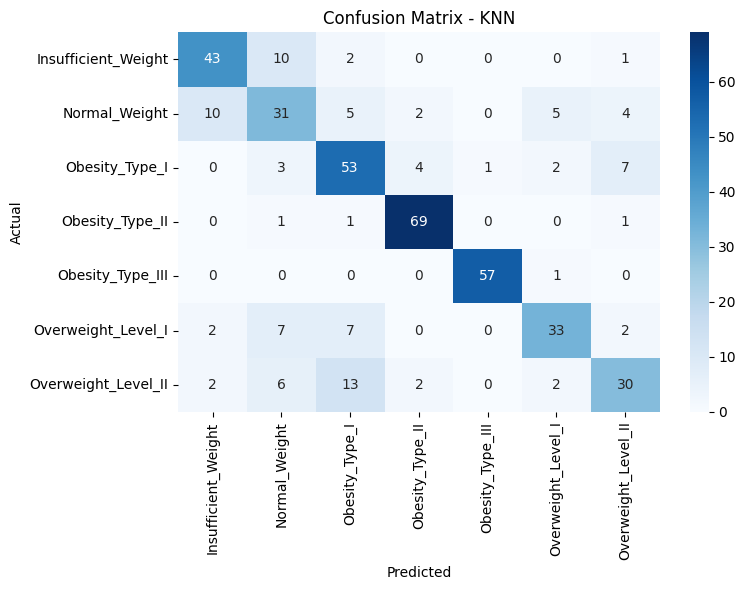

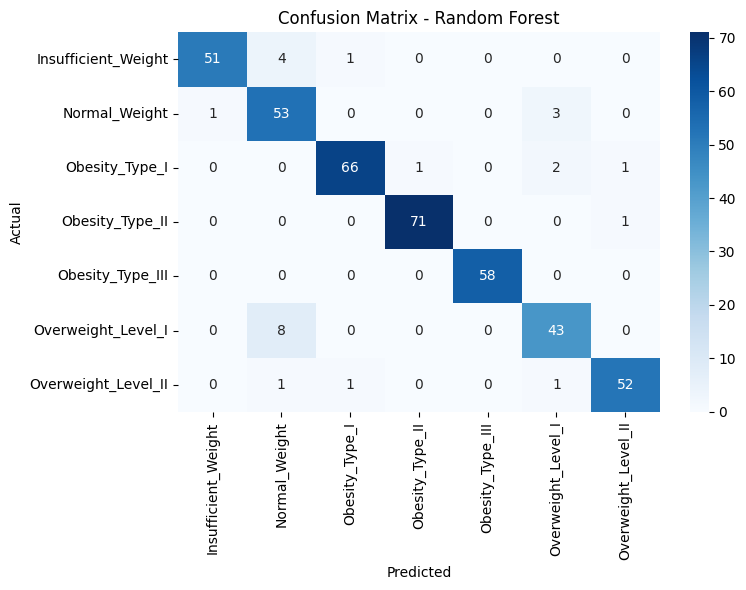

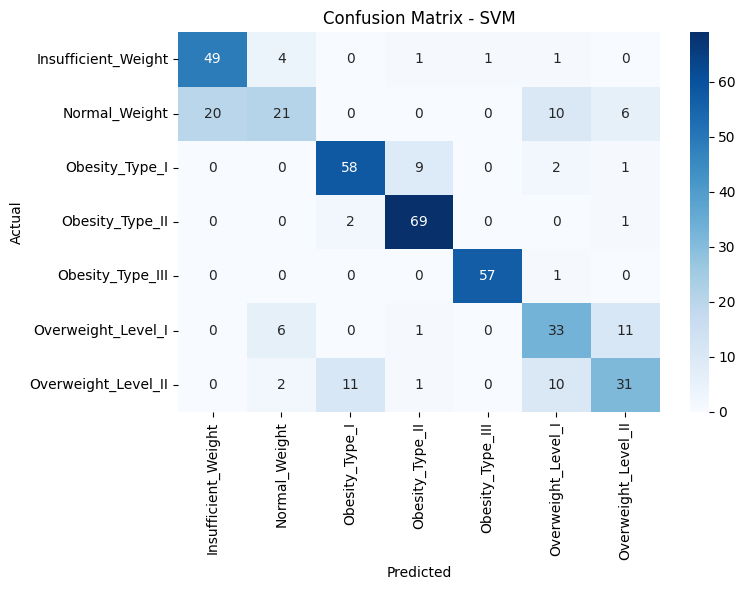

In [ ]:
# Membuat dictionary 'results' untuk menyimpan hasil evaluasi model
results = {
    'KNN': {
        'conf_matrix': conf_matrix_knn,
        'accuracy': accuracy_knn,
        'classification_report': report_knn
    },
    'Random Forest': {
        'conf_matrix': conf_matrix_rf,
        'accuracy': accuracy_rf,
        'classification_report': report_rf
    },
    'SVM': {
        'conf_matrix': conf_matrix_svm,
        'accuracy': accuracy_svm,
        'classification_report': report_svm
    }
}

# Visualisasi confusion matrix
for name in results:
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['conf_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


**VISUALISASI PERBANDINGAN AKURASI ANTARMODEL**

<ipython-input-138-4188411623>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


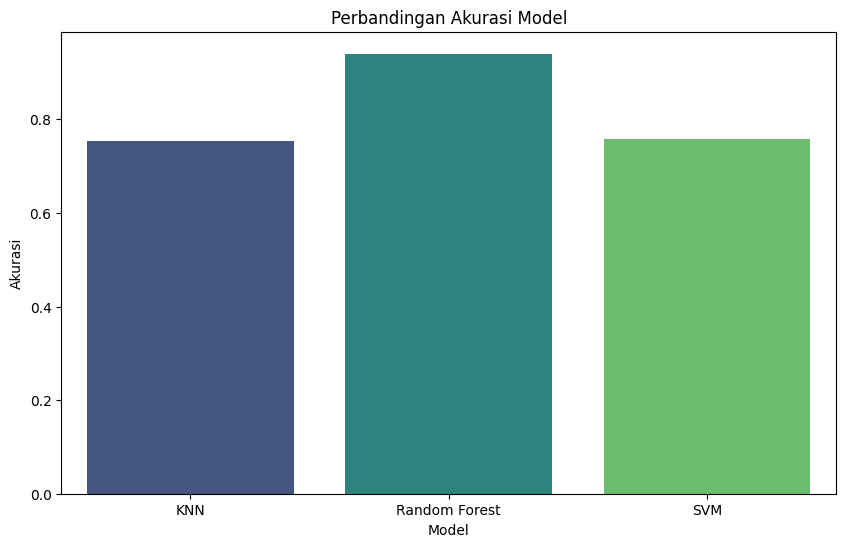

In [ ]:
# Visualisasi perbandingan akurasi antar model
models = ['KNN', 'Random Forest', 'SVM']
accuracies = [accuracy_knn, accuracy_rf, accuracy_svm]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Perbandingan Akurasi Model")
plt.xlabel("Model")
plt.ylabel("Akurasi")
plt.show()

**KESIMPULAN PROSES MODELING DAN EVALUASI**

Setelah melakukan proses pemodelan dan evaluasi, saya mencoba 3 model klasifikasi berbeda untuk memprediksi tingkat obesitas, yaitu K-Nearest Neighbors (KNN), Random Forest, dan Support Vector Machine (SVM). Setiap model dievaluasi menggunakan metrik akurasi, precision, recall, F1-Score, dan confusion matrix.

Berdasarkan hasil evaluasi, Random Forest memberikan akurasi lebih tinggi (94%) dibandingkan dengan KNN (75%) dan SVM (76%), menunjukkan bahwa Random Forest lebih efektif dalam menangani dataset ini. Confusion matrix membantu saya memahami bagaimana model memprediksi dengan benar atau salah, serta bagaimana model membedakan kelas-kelas seperti obesitas dan berat badan normal. Visualisasi perbandingan akurasi antar model menunjukkan bahwa Random Forest adalah yang terbaik.


# **HYPERPARAMETER TUNING**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**PERSIAPAN DATA**

In [ ]:
# Encode target
df['NObeyesdad'] = df['NObeyesdad'].astype('category').cat.codes

# Pisahkan fitur dan target
X = pd.get_dummies(df.drop('NObeyesdad', axis=1))
y = df['NObeyesdad']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**HYPERPARAMETER TUNING RANDOM FOREST**

In [ ]:
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_scaled, y_train)
y_pred_default = rf_default.predict(X_test_scaled)
acc_default = accuracy_score(y_test, y_pred_default)
print(f"Akurasi model default: {acc_default:.4f}")

Akurasi model default: 0.9427


AKURASI SETELAH TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
print(f"Akurasi setelah tuning: {acc_best:.4f}")

Akurasi setelah tuning: 0.9523


**HYPERPARAMETER TUNING SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Inisialisasi model
svm = SVC()

# Tentukan ruang parameter untuk dituning
param_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


AKURASI SETELAH TUNING

In [ ]:
# Randomized Search untuk SVM
random_search_svm = RandomizedSearchCV(svm, param_distributions=param_svm, n_iter=10, cv=3, random_state=42, n_jobs=-1)
random_search_svm.fit(X_train_scaled, y_train)

# Evaluasi hasil model terbaik
best_svm = random_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi SVM setelah tuning: {acc_svm:.4f}")

Akurasi SVM setelah tuning: 0.9165


**HYPERPARAMETER TUNING KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model
knn = KNeighborsClassifier()

# Ruang parameter tuning
param_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

random_search_knn = RandomizedSearchCV(knn, param_distributions=param_knn, n_iter=10, cv=3, random_state=42, n_jobs=-1)
random_search_knn.fit(X_train_scaled, y_train)

best_knn = random_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi KNN setelah tuning: {acc_knn:.4f}")


Akurasi KNN setelah tuning: 0.8544


**AKURASI SEMUA MODEL SETELAH TUNING**

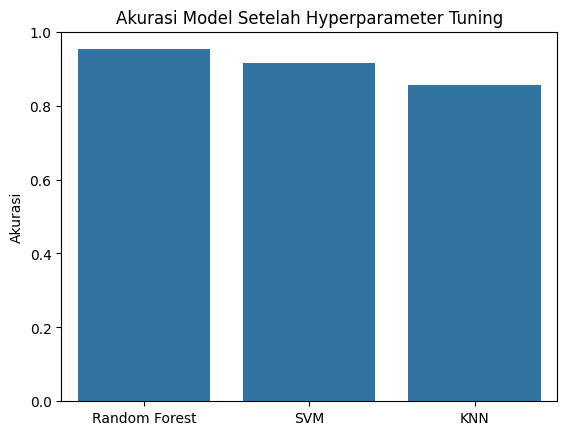

In [ ]:
model_names = ['Random Forest', 'SVM', 'KNN']
accuracies = [acc_best, acc_svm, acc_knn]

sns.barplot(x=model_names, y=accuracies)
plt.title("Akurasi Model Setelah Hyperparameter Tuning")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.show()


**VISUALISASI PERBANDINGAN AKURASI SEBELUM DAN SESUDAH TUNING**

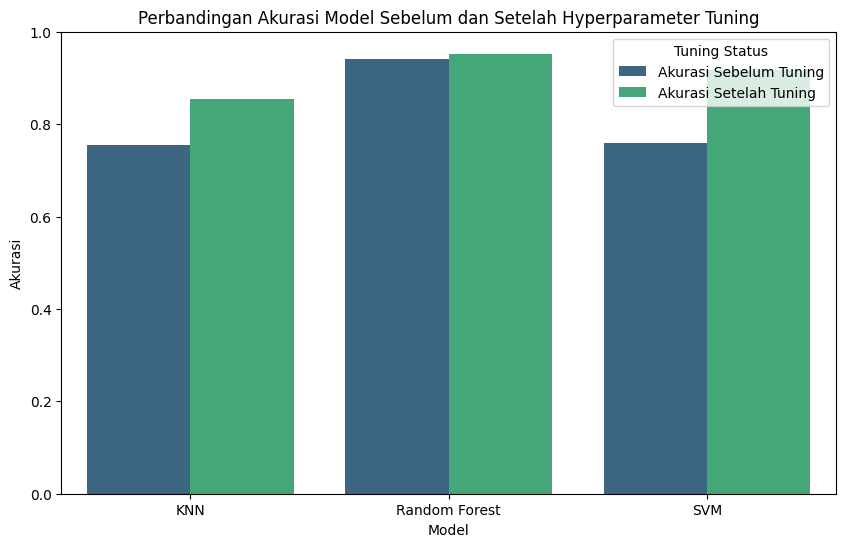

In [ ]:
# Visualisasi perbandingan akurasi
df_comparison_melted = df_comparison.melt('Model', var_name='Tuning Status', value_name='Akurasi')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Akurasi', hue='Tuning Status', data=df_comparison_melted, palette='viridis')
plt.title("Perbandingan Akurasi Model Sebelum dan Setelah Hyperparameter Tuning")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.show()


In [ ]:
# Menyimpan akurasi sebelum tuning (dari bagian Modeling dan Evaluasi)
accuracy_knn_before = accuracy_knn
accuracy_rf_before = accuracy_rf
accuracy_svm_before = accuracy_svm

# Menyimpan akurasi setelah tuning (dari bagian Hyperparameter Tuning)
accuracy_knn_after = acc_knn
accuracy_rf_after = acc_best # Akurasi Random Forest setelah tuning disimpan di acc_best
accuracy_svm_after = acc_svm

# Membuat DataFrame untuk perbandingan
comparison_data = {
    'Model': ['KNN', 'Random Forest', 'SVM'],
    'Akurasi Sebelum Tuning': [accuracy_knn_before, accuracy_rf_before, accuracy_svm_before],
    'Akurasi Setelah Tuning': [accuracy_knn_after, accuracy_rf_after, accuracy_svm_after]
}
df_comparison = pd.DataFrame(comparison_data)

print("Perbandingan Akurasi Sebelum dan Setelah Tuning:")
print(df_comparison)

Perbandingan Akurasi Sebelum dan Setelah Tuning:
           Model  Akurasi Sebelum Tuning  Akurasi Setelah Tuning
0            KNN                0.754177                0.854415
1  Random Forest                0.940334                0.952267
2            SVM                0.758950                0.916468


**KESIMPULAN PROSES HYPERPARAMETER TUNING**

Setelah saya melakukan HYPERPARAMETER TUNING pakai RandomizedSearchCV di model Random Forest, SVM, dan KNN, performa semua model jadi lebih baik dari sebelumnya. Akurasinya naik, KNN jadi 85%, Random Forest jadi 95%, SVM jadi  91%.

Random Forest model terbaik untuk kasus ini.

# **DEPLOYMENT**

In [153]:
import joblib

# Save the best model (Random Forest after tuning)
joblib.dump(best_rf, 'best_random_forest_model.pkl')

print("Best model (Random Forest) saved as 'best_random_forest_model.pkl'")

Best model (Random Forest) saved as 'best_random_forest_model.pkl'
